# Code

## Import

In [6]:
import sys, os
sys.path.append(os.getcwd())

In [ ]:
!pip install deepchem rdkit
!pip install xgboost
!pip install pytorch_lightning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw

## Visualization

In [9]:
df=pd.read_csv('data/raw/bace.csv')

In [10]:
df

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [11]:
df.describe()

,Class,pIC50,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,ChiralCenterCount,ChiralCenterCountAllPossible,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,0.456709,6.521991,479.661988,3.177080,3.732981,2.001322,8.049570,34.089227,0.522802,2.317250,...,52.348846,48.763740,181.835580,148.442348,30.371697,3.488650,11.740560,1.239762,14.387597,783.779907
std,0.498287,1.342417,122.083053,1.396633,1.444778,1.629343,4.741135,8.520088,1.162539,1.612558,...,25.993800,18.201519,99.717702,60.548833,12.162452,5.148336,9.073406,3.293804,13.329890,444.468806
min,0.000000,2.544546,138.187000,-4.361100,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,-3.551821,1.916970,-5.536391,-2.216191,-7.286308,-6.106466,-7.379991,-1.273524,1.000000
25%,0.000000,5.585027,389.331300,2.335500,3.000000,0.000000,4.000000,28.000000,0.000000,1.000000,...,34.319988,36.547150,102.233770,102.510450,20.132990,0.000000,7.980170,0.000000,0.000000,407.000000
50%,0.000000,6.761954,463.628300,3.171300,4.000000,2.000000,7.000000,33.000000,0.000000,2.000000,...,51.479984,47.624382,171.917220,140.683620,30.107586,0.550130,8.188327,0.000000,21.710098,788.000000
75%,1.000000,7.540000,564.639530,4.015500,4.000000,3.000000,11.000000,40.000000,1.000000,3.000000,...,66.553795,58.844093,253.679080,185.659260,37.133846,7.980170,15.879790,0.000000,24.663788,1167.000000
max,1.000000,10.522879,1350.473300,7.617400,12.000000,15.000000,40.000000,97.000000,10.000000,12.000000,...,161.342860,124.272730,865.473330,378.516270,121.671900,29.823961,80.218018,16.681131,61.659470,1547.000000


In [10]:
df_bace=df[['mol','pIC50']]

In [13]:
df_bace

,mol,pIC50
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970
...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,3.000000
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,3.000000
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,2.953115
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,2.733298


In [11]:
def canonicalize_smiles(smiles):
        '''This function takes a non-canonical SMILES and
        returns the canonical version
        Args:
            -smiles: str, non-canonical SMILES of a molecule
        Out:
            - canonical_smiles: str, canonical SMILES of the molecule
        '''

        mol = Chem.MolFromSmiles(smiles) # create a mol object from input smiles

        canonical_smiles = Chem.MolToSmiles(mol) # convert the previous mol object to SMILES using Chem.MolToSmiles()


        return canonical_smiles


    # apply canonical smiles to our df
df_bace['canonical_smiles'] = df_bace['mol'].apply(canonicalize_smiles)


/tmp/ipython-input-4287560437.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bace['canonical_smiles'] = df_bace['mol'].apply(canonicalize_smiles)


In [12]:
df_bace

,mol,pIC50,canonical_smiles
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3...
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872,CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F...
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970,CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2...
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,3.000000,CCC(CC(=O)NCC1CCOCC1)n1c(N)nc2cc(Cl)ccc21
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,3.000000,CCC(CC(=O)NCc1ccccn1)n1c(N)nc2cc(Cl)ccc21
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,2.953115,Cn1c(N)nc(C2CC2c2cccc(Br)c2)cc1=O
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,2.733298,Cn1c(N)nc(C2CC2c2cccc(-c3ccccc3)c2)cc1=O


<Axes: >

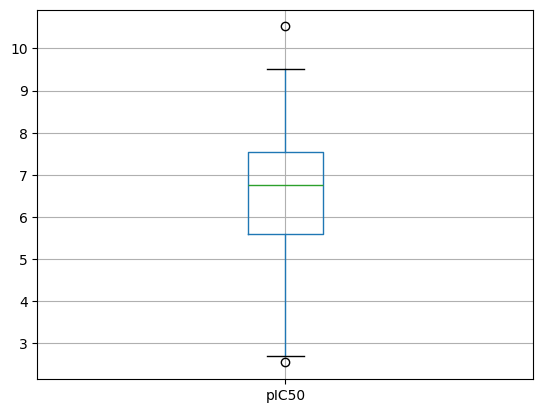

In [16]:
df_bace.boxplot(column='pIC50')

In [17]:
    num_rows = len(df_bace)
    num_unique_smiles = df_bace['canonical_smiles'].nunique()

    print(f"\nTotal number of rows in the DataFrame: {num_rows}")
    print(f"\nNumber of unique canonical SMILES: {num_unique_smiles}\n")

    # drop old 'smiles' column
    df_bace = df_bace.drop(columns='mol')


    print(f"\n--- BACE Preprocessing Report ---\n")
    print(f"Final dataset size: {df_bace.shape}\n")



Total number of rows in the DataFrame: 1513

Number of unique canonical SMILES: 1513


--- BACE Preprocessing Report ---

Final dataset size: (1513, 2)



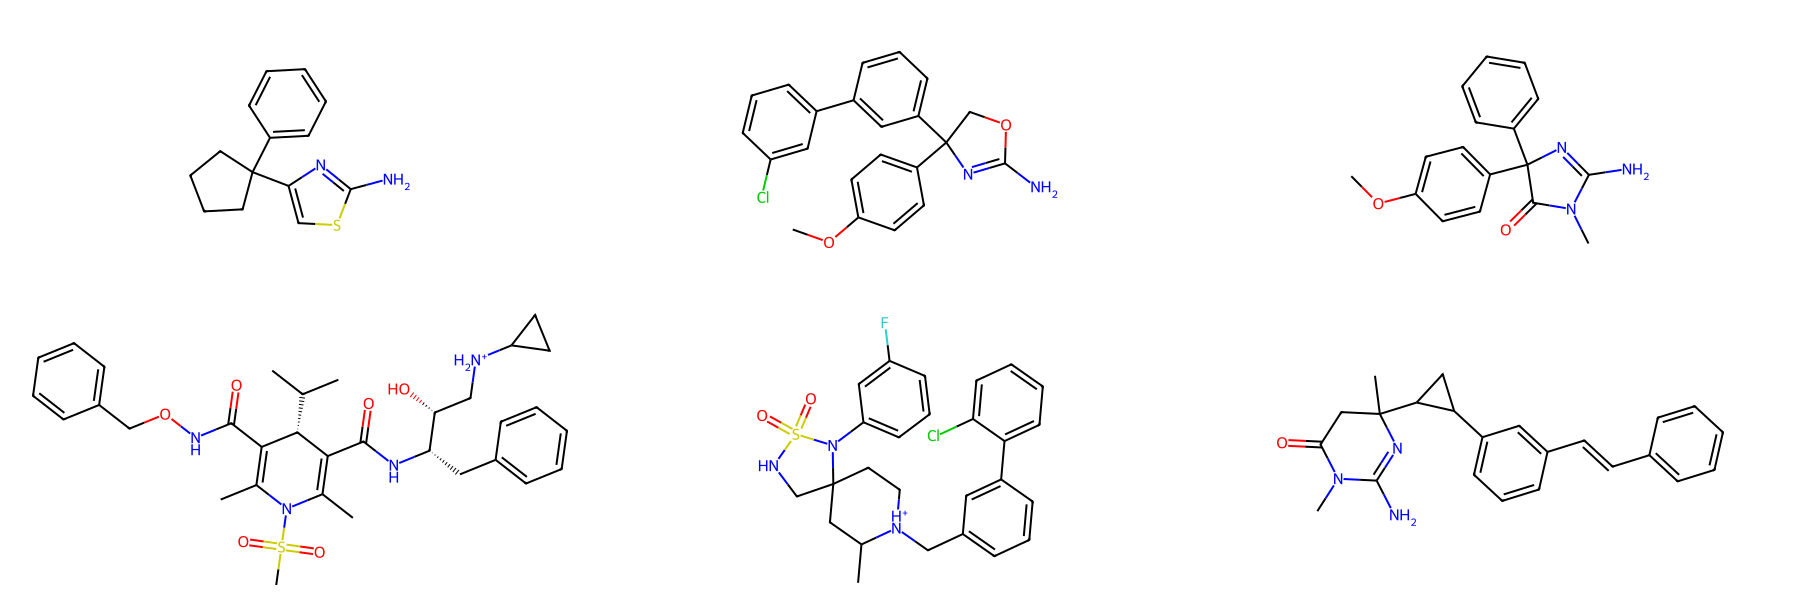

In [18]:

# Visualize some of the molecules of this dataset
n=6
df_sample=df_bace.sample(n)

smiles = df_sample['canonical_smiles'].values
legend = df_sample['pIC50'].values
molecs = [Chem.MolFromSmiles(s) for s in smiles]

Draw.MolsToGridImage(
    molecs,
    subImgSize=(600,300),
)

In [19]:
total_na_values = df_bace.isna().sum().sum()
print(f"\nTOTAL number of Na in the DataFrame: {total_na_values}")
non_numeric_df = df_bace.select_dtypes(exclude=np.number)
print("\nNon-Numeric Columns (Categorical/Objects):")
print(non_numeric_df.columns.tolist())


TOTAL number of Na in the DataFrame: 0

Non-Numeric Columns (Categorical/Objects):
['canonical_smiles']


In [20]:
df_bace

,pIC50,canonical_smiles
0,9.154901,Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3...
1,8.853872,CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F...
2,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
3,8.698970,CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2...
4,8.698970,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
...,...,...
1508,3.000000,CCC(CC(=O)NCC1CCOCC1)n1c(N)nc2cc(Cl)ccc21
1509,3.000000,CCC(CC(=O)NCc1ccccn1)n1c(N)nc2cc(Cl)ccc21
1510,2.953115,Cn1c(N)nc(C2CC2c2cccc(Br)c2)cc1=O
1511,2.733298,Cn1c(N)nc(C2CC2c2cccc(-c3ccccc3)c2)cc1=O


## Featurization

In [ ]:
from Regression.src.featurizers import featurize_molecules
features = featurize_molecules(df=df_bace,
    methods=["rdkit", "ecfp","maccs"],smiles_col="canonical_smiles",
    target_col="pIC50",concatenate=False)

In [14]:
features['rdkit'].columns

Index(['canonical_smiles', 'pIC50', 'rdkit_0', 'rdkit_1', 'rdkit_2', 'rdkit_3',
       'rdkit_4', 'rdkit_5', 'rdkit_6', 'rdkit_7',
       ...
       'rdkit_182', 'rdkit_183', 'rdkit_184', 'rdkit_185', 'rdkit_186',
       'rdkit_187', 'rdkit_188', 'rdkit_189', 'rdkit_190', 'rdkit_191'],
      dtype='object', length=194)

In [ ]:
concatenated_features= featurize_molecules(df=df_bace,
    methods=["rdkit", "ecfp","maccs"],concatenate=True)

In [16]:
features['rdkit'].columns

Index(['canonical_smiles', 'pIC50', 'rdkit_0', 'rdkit_1', 'rdkit_2', 'rdkit_3',
       'rdkit_4', 'rdkit_5', 'rdkit_6', 'rdkit_7',
       ...
       'rdkit_182', 'rdkit_183', 'rdkit_184', 'rdkit_185', 'rdkit_186',
       'rdkit_187', 'rdkit_188', 'rdkit_189', 'rdkit_190', 'rdkit_191'],
      dtype='object', length=194)

## Baseline ML Models

In [ ]:
from Regression.src import baseline_regression_models
results_base_models, trained_base_models=baseline_regression_models.run_base_regressors(features)

Running models for featurizer: rdkit
Applied Standard scaling (continuous features detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Running models for featurizer: ecfp
 Skipping scaling (binary fingerprint detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Running models for featurizer: maccs
 Skipping scaling (binary fingerprint detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Finished training all models.
  Featurizer         Model        R2      RMSE
5       ecfp           SVR  0.779339  0.614987
3       ecfp  RandomForest  0.699172  0.718063
4       ecfp       XGBoost  0.691204  0.727510
8      maccs           SVR  0.676656  0.744450
6      maccs  RandomForest  0.646910  0.777939
7      maccs       XGBoost  0.613675  0.813728
2      rdkit           SVR  0.722587  0.689551
0      rdkit  RandomForest  0.717549  0.695784
1      rdkit       XGBoost  0.712659  0.701781


In [ ]:
from Regression.src.baseline_regression_models import run_base_regressors, run_base_regressors_kv, run_gridsearch
from sklearn.model_selection import train_test_split
import pandas as pd

features_dict = features

for feat_name, df_feat in features_dict.items():

    X = df_feat.drop(columns=["canonical_smiles", "pIC50"], axis=1).values
    y = df_feat["pIC50"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results_df, trained_models = run_base_regressors(X_train, X_test, y_train, y_test, feat_name)

Running models for featurizer: rdkit
Applied StandardScaler (continuous features detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Finished training all models.
  Featurizer         Model        R2      RMSE
2      rdkit           SVR  0.745756  0.660128
0      rdkit  RandomForest  0.718810  0.694229
1      rdkit       XGBoost  0.712171  0.702376
Running models for featurizer: ecfp
Skipping scaling (binary features detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Finished training all models.
  Featurizer         Model        R2      RMSE
2       ecfp           SVR  0.779339  0.614987
0       ecfp  RandomForest  0.699172  0.718063
1       ecfp       XGBoost  0.691204  0.727510
Running models for featurizer: maccs
Skipping scaling (binary features detected).
Training RandomForest...
Training XGBoost...
Training SVR...
Finished training all models.
  Featurizer         Model        R2      RMSE
2      maccs           SVR  0.676656  0.744450
0 

In [ ]:
from Regression.src.baseline_regression_models import run_base_regressors_kv

cv_results, best_models = run_base_regressors_kv(features_dict)

 Featurizer: rdkit
Continuous descriptors:using StandardScaler.
 RandomForest: R²=0.699, RMSE=0.730
 XGBoost: R²=0.713, RMSE=0.714
 SVR: R²=0.720, RMSE=0.704
 Best model for rdkit: SVR (R²=0.720)
 Featurizer: ecfp
Binary fingerprints: no scaling applied.
 RandomForest: R²=0.716, RMSE=0.712
 XGBoost: R²=0.715, RMSE=0.713
 SVR: R²=0.764, RMSE=0.647
 Best model for ecfp: SVR (R²=0.764)
 Featurizer: maccs
Binary fingerprints: no scaling applied.
 RandomForest: R²=0.650, RMSE=0.788
 XGBoost: R²=0.689, RMSE=0.742
 SVR: R²=0.663, RMSE=0.773
 Best model for maccs: XGBoost (R²=0.689)
Cross-validation complete.

  Featurizer         Model   R2_mean    R2_std  RMSE_mean  RMSE_std
5       ecfp           SVR  0.763634  0.040370   0.647475  0.057558
3       ecfp  RandomForest  0.715505  0.032617   0.711736  0.044094
4       ecfp       XGBoost  0.714677  0.033423   0.712769  0.046056
7      maccs       XGBoost  0.689412  0.044849   0.742143  0.042397
8      maccs           SVR  0.663317  0.047882   0

In [ ]:
from Regression.src.baseline_regression_models import run_gridsearch
grid_search_input_dict = {feat_name: df_feat}

grid_search_results, grid_models= run_gridsearch(
    grid_search_input_dict,
    X_train, X_test, y_train, y_test,
    verbose=True
)

## MLP on each featurization vs MLP with the 3 featurizations

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:751: Checkpoint directory /content/Chemoinformatics_project/mlp_checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | network   | Sequential | 264 K  | train
1 | criterion | MSELoss    | 0      | train
-------------------------------------------------
264 K     Trainable params
0         Non-trainable params
264 K     Total params
1.060     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


Training MLP model on rdkit...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    2.0677106380462646     │
│         test_rmse         │    1.4379535913467407     │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:751: Checkpoint directory /content/Chemoinformatics_project/mlp_checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | network   | Sequential | 686 K  | train
1 | criterion | MSELoss    | 0      | train
-------------------------------------------------
686 K     Trainable params
0         Non-trainable params
686 K     Total params
2.747     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


MLP Test RMSE for rdkit: 1.4380
Training MLP model on ecfp...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.4379744827747345     │
│         test_rmse         │    0.6617963910102844     │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:751: Checkpoint directory /content/Chemoinformatics_project/mlp_checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | network   | Sequential | 239 K  | train
1 | criterion | MSELoss    | 0      | train
-------------------------------------------------
239 K     Trainable params
0         Non-trainable params
239 K     Total params
0.957     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


MLP Test RMSE for ecfp: 0.6618
Training MLP model on maccs...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6848549246788025     │
│         test_rmse         │    0.8275595903396606     │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:751: Checkpoint directory /content/Chemoinformatics_project/mlp_checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | network   | Sequential | 857 K  | train
1 | criterion | MSELoss    | 0      | train
-------------------------------------------------
857 K     Trainable params
0         Non-trainable params
857 K     Total params
3.431     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


MLP Test RMSE for maccs: 0.8276
Training MLP model on combined...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.5016868114471436     │
│         test_rmse         │    0.7082985043525696     │
└───────────────────────────┴───────────────────────────┘

MLP Test RMSE for combined: 0.7083

--- Summary of all MLP RMSE results ---
{'rdkit': 1.4379535913467407, 'ecfp': 0.6617963910102844, 'maccs': 0.8275595903396606, 'combined': 0.7082985043525696}


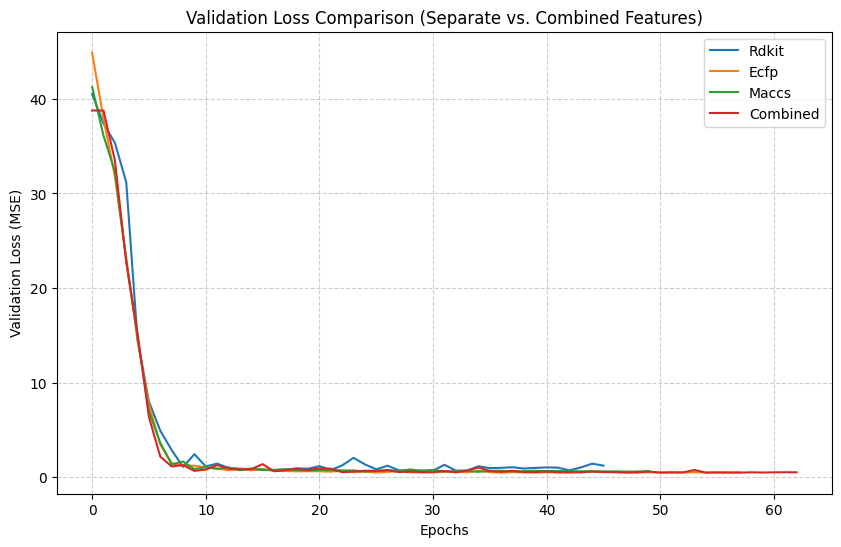

In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import pytorch_lightning as pl
from torch.utils.data import DataLoader, random_split, TensorDataset
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from Regression.src.MLP import MLP_BACE
from pytorch_lightning.loggers import CSVLogger
import matplotlib.pyplot as plt
import os

features_dict = features
mlp_results_rmse = {}

target_and_smiles = features_dict[list(features_dict.keys())[0]][["canonical_smiles", "pIC50"]].reset_index(drop=True)

feature_dfs = [df.drop(columns=["canonical_smiles", "pIC50"], errors='ignore').reset_index(drop=True)
               for df in features_dict.values()]

combined_features_only = pd.concat(feature_dfs, axis=1)

df_feat_combined = pd.concat([target_and_smiles, combined_features_only], axis=1)

all_features_to_run = features_dict.copy()
all_features_to_run['combined'] = df_feat_combined

for feat_name, df_feat in all_features_to_run.items():

    X = df_feat.drop(columns=["canonical_smiles", "pIC50"], axis=1).values
    y = df_feat["pIC50"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

    train_dataset_full = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_size = int(0.875 * len(train_dataset_full))
    val_size = len(train_dataset_full) - train_size

    train_subset, val_subset = random_split(
        train_dataset_full, [train_size, val_size],
        generator=torch.Generator().manual_seed(42)
    )

    batch_size = 32
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    input_dim = X_train.shape[1]
    mlp_model = MLP_BACE(
        input_dim=input_dim,
        out_dim=1)

    logger = CSVLogger('lightning_logs', name=f'mlp_run_{feat_name}')

    checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        dirpath='mlp_checkpoints/',
        filename=f'best-mlp-{feat_name}-model',
        save_top_k=1,
        mode='min'
    )
    early_stop_callback = EarlyStopping(
        monitor='val_loss',
        patience=15,
        mode='min',
        verbose=False
    )

    trainer = pl.Trainer(
        max_epochs=100,
        callbacks=[checkpoint_callback, early_stop_callback],
        logger=logger,
        accelerator='auto',
        log_every_n_steps=10,
        enable_progress_bar=True
    )
    print(f"Training MLP model on {feat_name}...")
    trainer.fit(mlp_model, train_loader, val_loader)

    test_results = trainer.test(mlp_model, dataloaders=test_loader)

    current_rmse = test_results[0].get('test_rmse')
    mlp_results_rmse[feat_name] = current_rmse

    print(f"MLP Test RMSE for {feat_name}: {current_rmse:.4f}")

print("\n--- Summary of all MLP RMSE results ---")
print(mlp_results_rmse)

plot_results = {}
for feat_name in all_features_to_run.keys():
    log_dir = os.path.join('lightning_logs', f'mlp_run_{feat_name}')
    metrics_path_v0 = os.path.join(log_dir, 'version_0', 'metrics.csv')
    metrics_path_v1 = os.path.join(log_dir, 'version_1', 'metrics.csv')

    if os.path.exists(metrics_path_v0):
        metrics_df = pd.read_csv(metrics_path_v0)
    elif os.path.exists(metrics_path_v1):
        metrics_df = pd.read_csv(metrics_path_v1)
    else:
        continue

    val_loss = metrics_df['val_loss'].dropna().reset_index(drop=True)
    if not val_loss.empty:
        plot_results[feat_name] = val_loss

plt.figure(figsize=(10, 6))
for name, loss_values in plot_results.items():
    plt.plot(loss_values.index, loss_values.values, label=name.capitalize())

plt.title("Validation Loss Comparison (Separate vs. Combined Features)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss (MSE)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

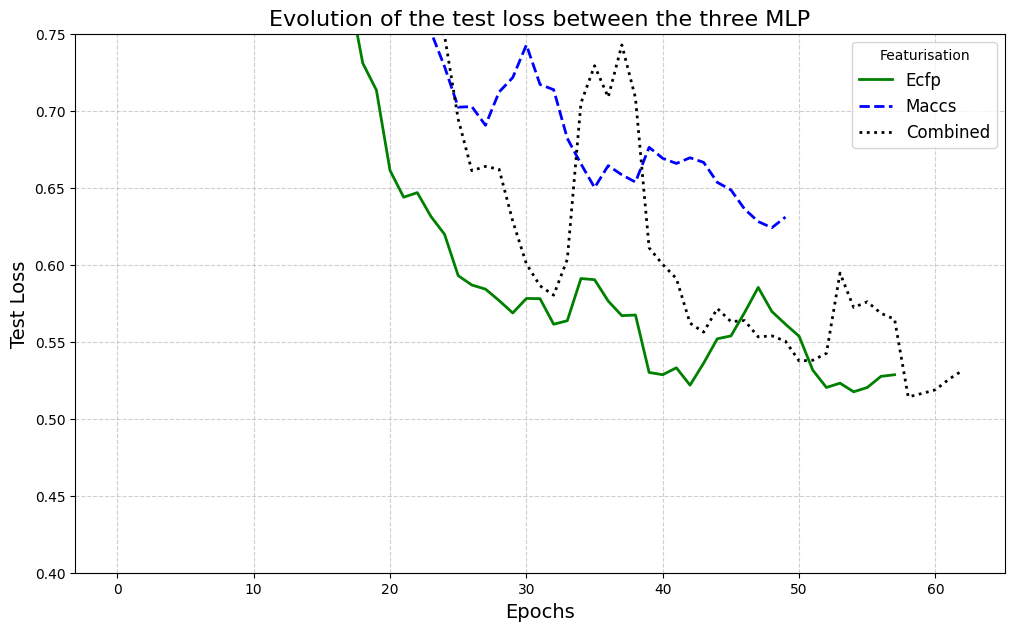

In [29]:
plt.figure(figsize=(12, 7))
markers = ['o', 's', '^', 'D']
line_styles = ['-', '--', ':', '-.']
color_map = {'rdkit': 'red', 'ecfp': 'green', 'maccs': 'blue', 'combined': 'black'}

# Filter RDKit out
filtered_plot_results = {k: v for k, v in plot_results.items() if k != 'rdkit'}

# Define smoothing window
SMOOTHING_WINDOW = 5

for i, (name, loss_values) in enumerate(filtered_plot_results.items()):

    # Apply rolling average for smoothing
    smoothed_loss = loss_values.rolling(window=SMOOTHING_WINDOW, min_periods=1).mean()

    plt.plot(
        smoothed_loss.index,
        smoothed_loss.values,
        label=name.capitalize(),
        color=color_map.get(name, 'gray'),
        linestyle=line_styles[i % 4],
        linewidth=2
    )

plt.title("Evolution of the test loss between the three MLP", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel(f"Test Loss", fontsize=14)

plt.ylim(0.4, 0.75)

plt.legend(title="Featurisation", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()